# Analysis of Ethereum Transactions and Smart Contracts

<b>Name:</b> Eleanor Prashamshini <br>
<b>Student ID:</b> 220772291 <br>
<b>Course:</b> Big Data Processing <br>
<b>Course Code:</b> ECS765P <br>

In [1]:
#setup
import matplotlib.pyplot as plt
import numpy as np
import math
from time import gmtime, strftime

In [2]:
def monthly_plots(x, y, y_label, plot_type="line"):
    plt.figure(figsize=(40,20))
    if plot_type == "bar":
        plt.bar(x, y)
    else:
        plt.plot(x, y)
    plt.xticks(rotation=90)
    plt.rc('xtick', labelsize=25)
    plt.rc('ytick', labelsize=25)
    plt.xlabel("Months", fontsize=50)
    plt.ylabel(y_label, fontsize=50)
    plt.show()

## Part A: Time Analysis

- Create a bar plot showing the number of transactions occurring every month between the start and end of the dataset.
- Create a bar plot showing the average value of transaction in each month between the start and end of the dataset.

<b>Note:</b> As the dataset spans multiple years and you are aggregating together all transactions in the same month, make sure to include the year in your analysis.

<b>Note:</b> Once the raw results have been processed within Spark you may create your bar plot in any software of your choice (excel, python, R, etc.)

## Solution

In [3]:
# Task A output: List of - [month, count, average value]
taskA_output = np.array([["2015/08", 85609, 4.8052118459597475e+20], ["2015/09", 173805, 7.046467945767368e+19], 
                         ["2015/10", 205045, 7.416931809333908e+19], ["2015/11", 234733, 5.94847438624968e+19], 
                         ["2015/12", 347092, 2.6764096183940473e+19], ["2016/01", 404816, 6.1066070477195534e+19], 
                         ["2016/02", 520040, 6.554760875990387e+19], ["2016/03", 917170, 4.585306412778079e+19], 
                         ["2016/04", 1023096, 2.2670632047053574e+19], ["2016/05", 1346796, 4.704660952446771e+19], 
                         ["2016/06", 1351536, 3.0490334850064945e+19], ["2016/07", 1356907, 9.577823510582164e+19], 
                         ["2016/08", 1405743, 5.908198737290138e+19], ["2016/09", 1387412, 3.2627612247557698e+19], 
                         ["2016/10", 1329847, 3.244442633970926e+19], ["2016/11", 1301586, 3.964431643835121e+19], 
                         ["2016/12", 1316131, 6.146658677538123e+19], ["2017/01", 1409664, 5.620285956535014e+19], 
                         ["2017/02", 1410048, 5.558009016262989e+19], ["2017/03", 2426471, 1.770215809422216e+20], 
                         ["2017/04", 2539966, 1.113500746219076e+20], ["2017/05", 4245516, 1.2484777365193179e+20], 
                         ["2017/06", 7244657, 5.678772230936388e+19], ["2017/07", 7835875, 6.4981463792719405e+19], 
                         ["2017/08", 10523178, 4.827395651885162e+19], ["2017/09", 10679242, 3.4372115150831194e+19], 
                         ["2017/10", 12602063, 2.676151521563103e+19], ["2017/11", 15292269, 2.964110327474005e+19], 
                         ["2017/12", 26732085, 1.3731223538323216e+19], ["2018/01", 33504270, 1.1164572720750377e+19], 
                         ["2018/02", 22231978, 6.23036279509096e+18], ["2018/03", 20261862, 2.72807989116239e+18], 
                         ["2018/04", 20876642, 2.449268234852112e+18], ["2018/05", 25105717, 2.498190913653174e+18], 
                         ["2018/06", 22471788, 2.8085234163056707e+18], ["2018/07", 19937033, 2.2749347554396434e+18], 
                         ["2018/08", 19842059, 2.3989507981127404e+18], ["2018/09", 16056742, 3.7334811019825193e+18], 
                         ["2018/10", 17056926, 3.0704021430259717e+18], ["2018/11", 16713911, 5.397909048901787e+18], 
                         ["2018/12", 17107601, 5.944894163484836e+18], ["2019/01", 1002431, 4.2547896734505953e+18]])
taskA_output.shape

(42, 3)

### A.1: Number of transactions every month

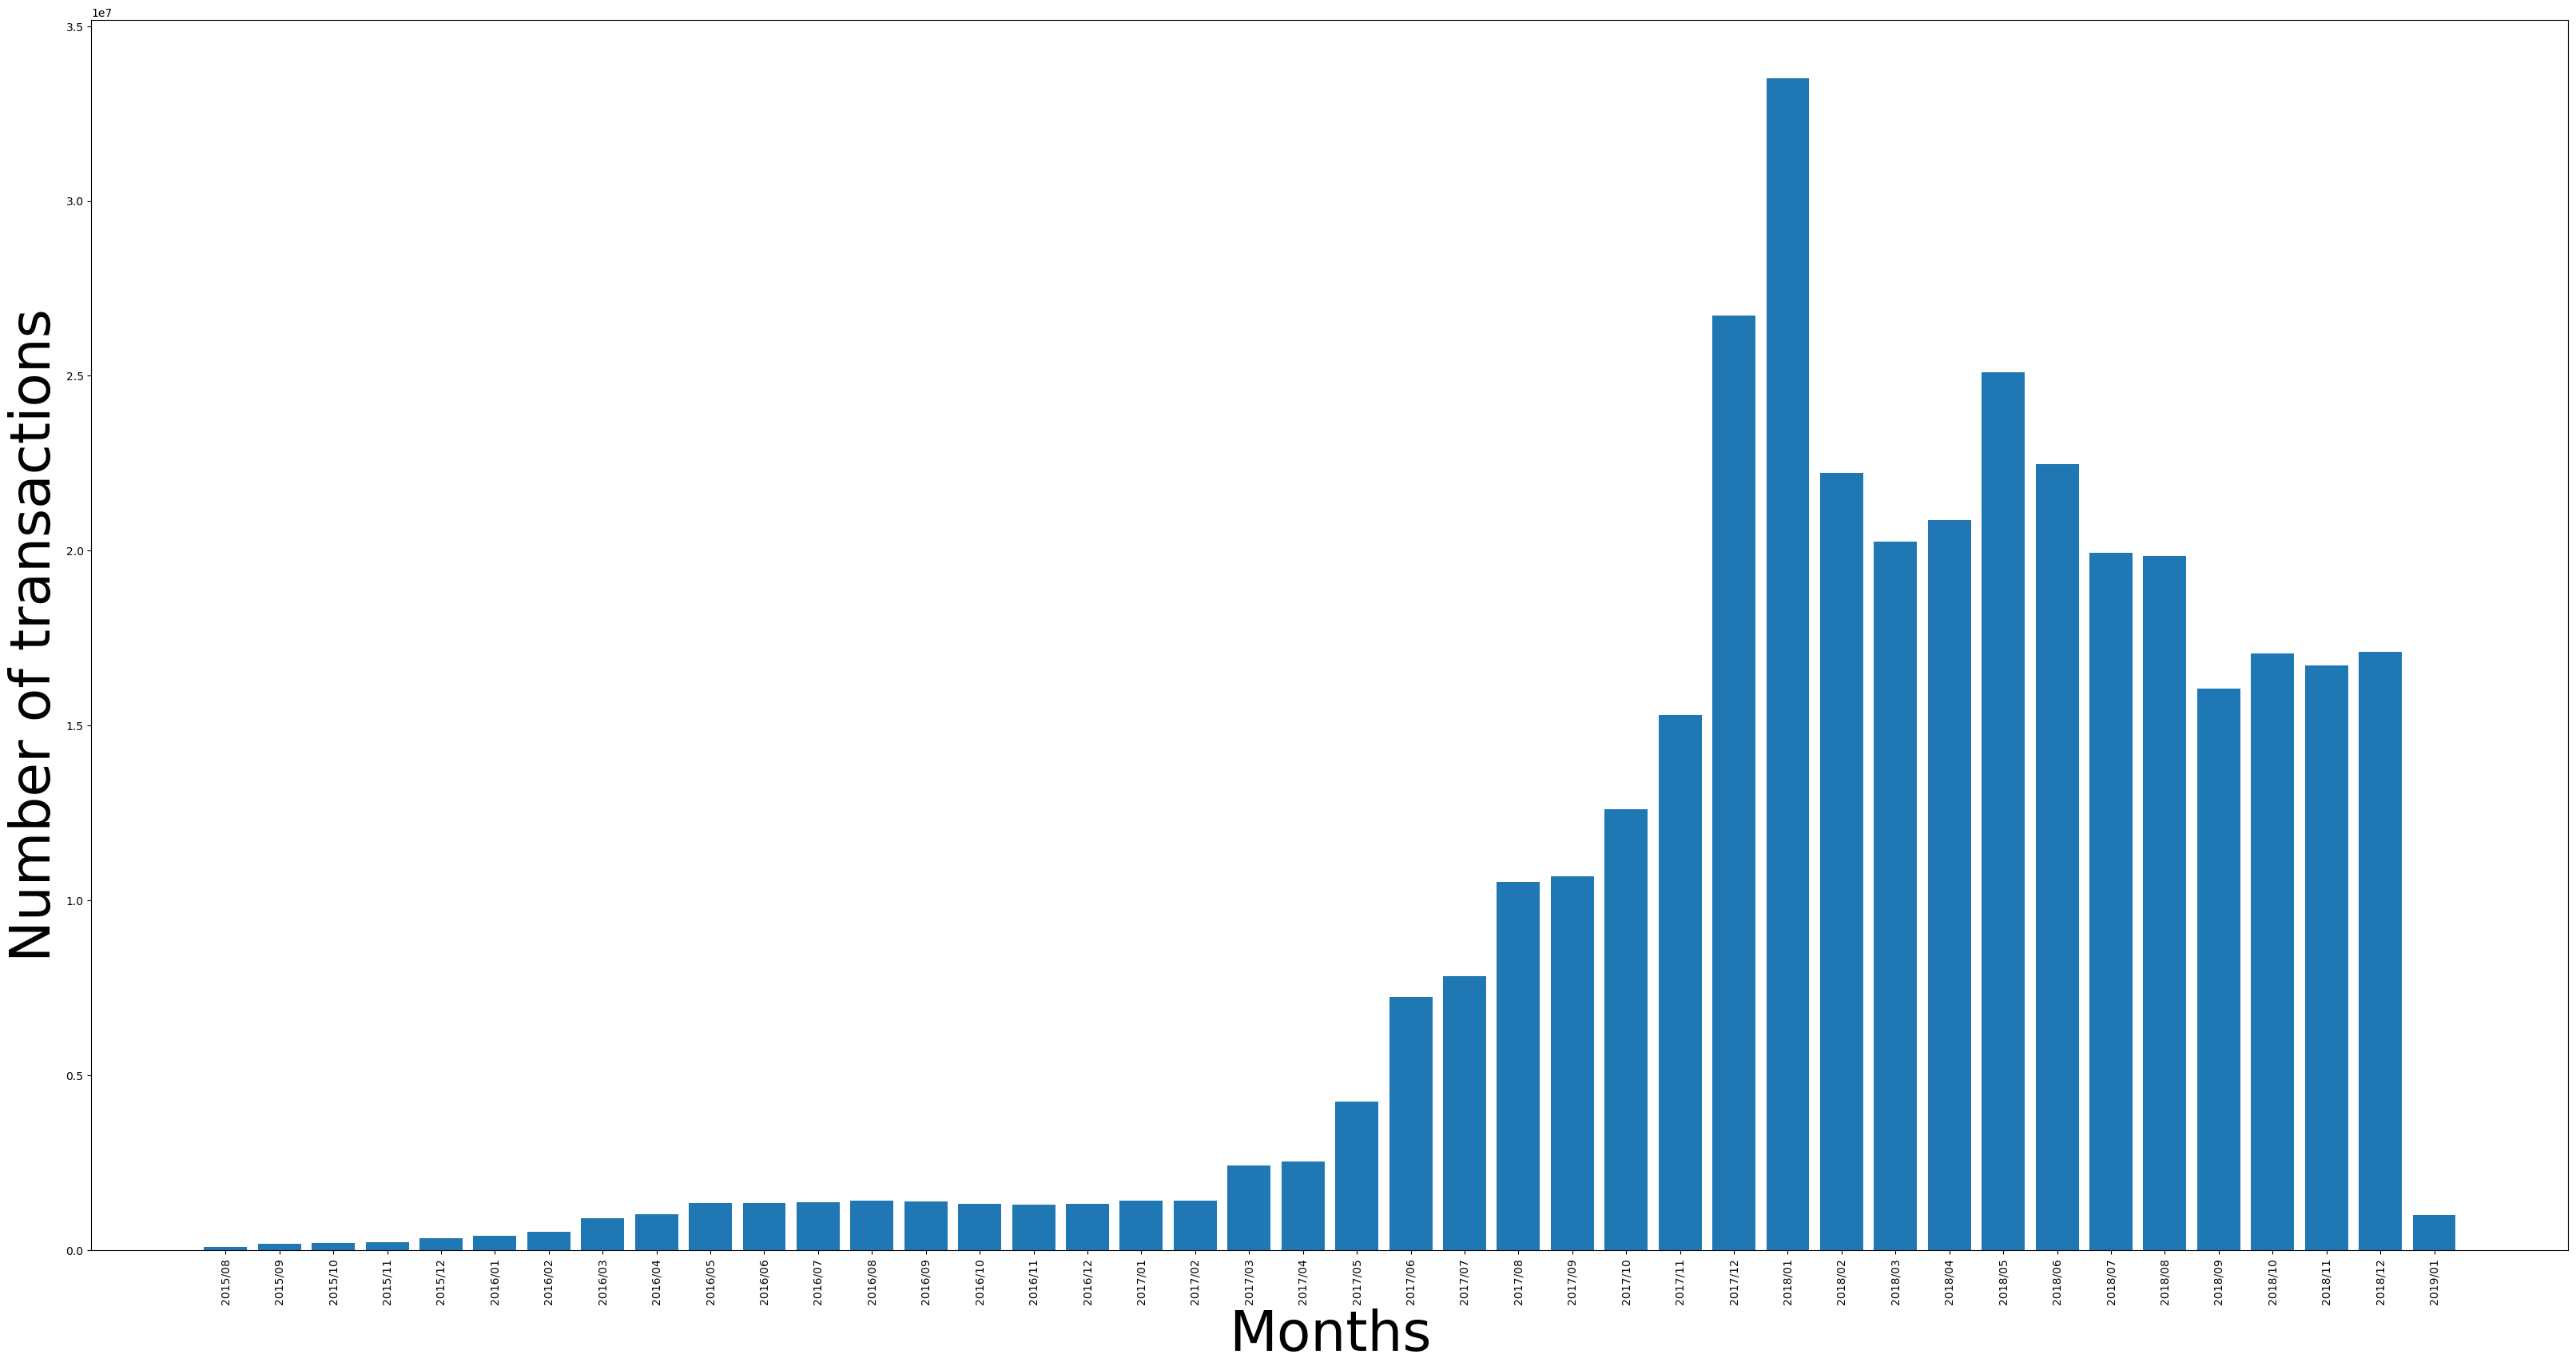

In [4]:
monthly_plots(taskA_output[:,0], [float(x) for x in taskA_output[:,1]], 
              "Number of transactions", plot_type = "bar")

### A.2: Average value of transactions every month

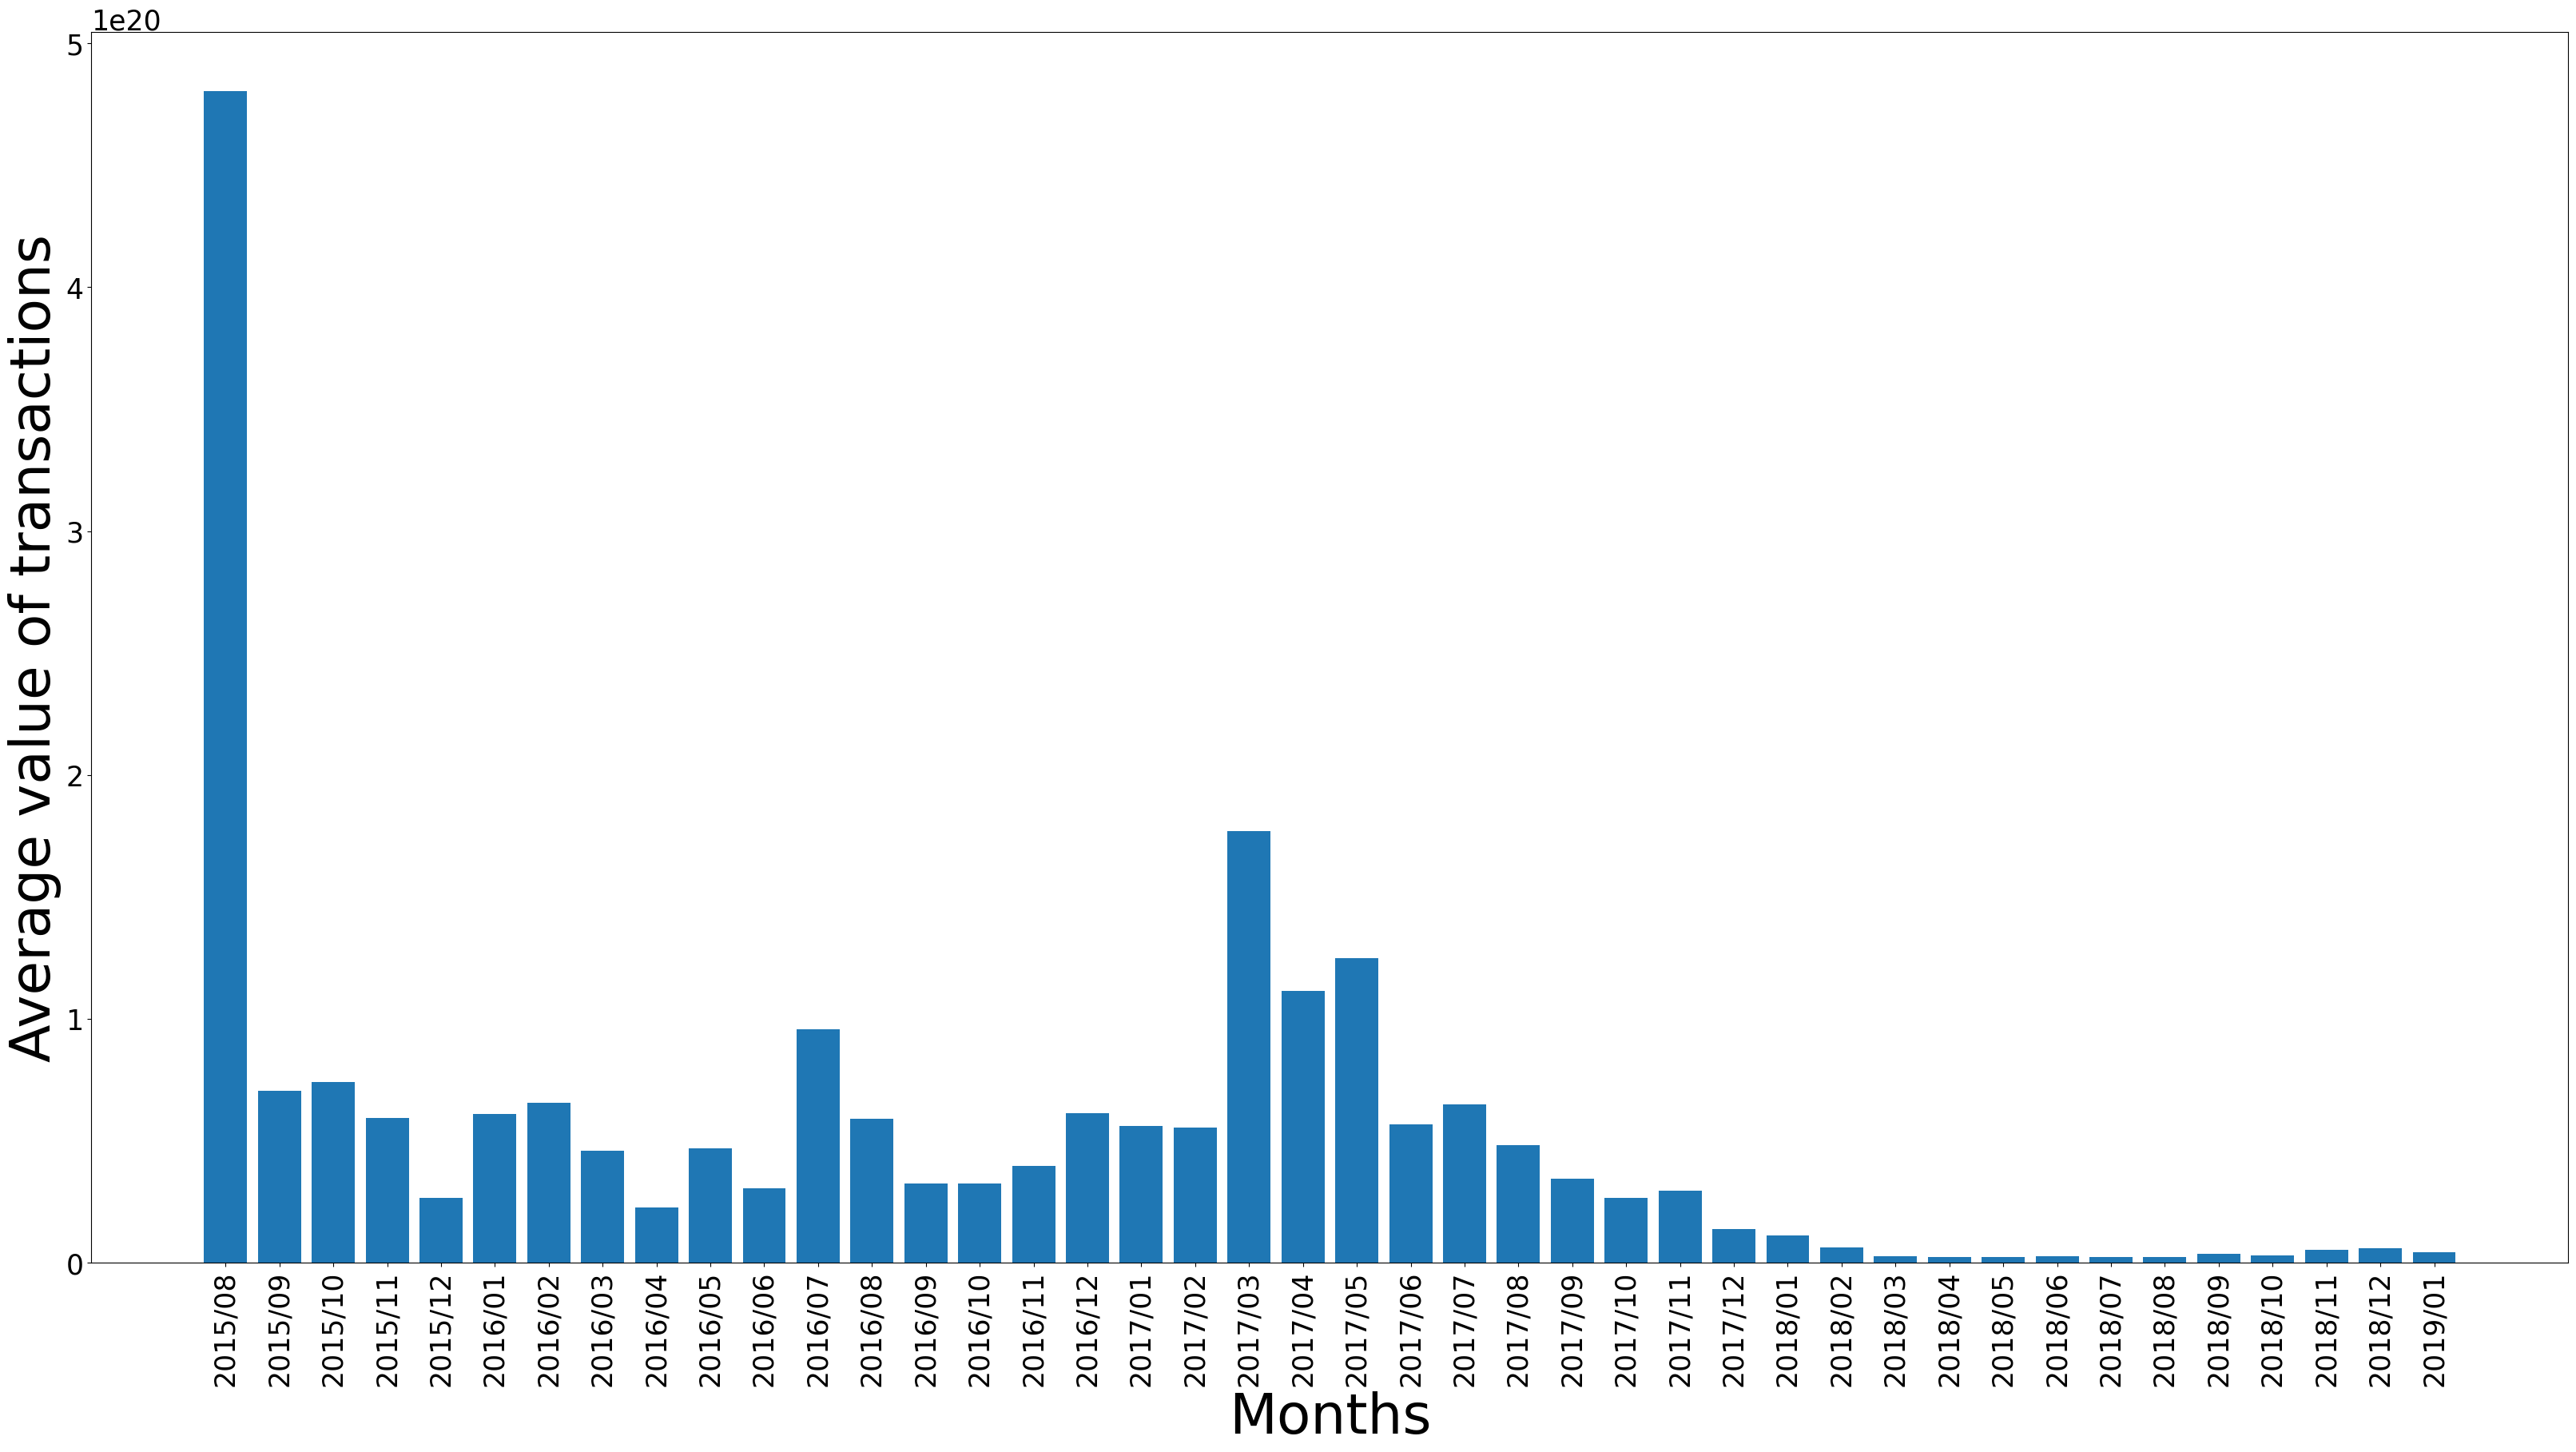

In [5]:
monthly_plots(taskA_output[:,0], [float(x) for x in taskA_output[:,2]], 
              "Average value of transactions", plot_type = "bar")

## Part B: Top Ten Most Popular Services 

Evaluate the top 10 smart contracts by total Ether received. You will need to join <b>address</b> field in the contracts dataset to the <b>to_address</b> in the transactions dataset to determine how much ether a contract has received.

## Solution

In [6]:
# Task B output: List of - [address, value]
taskB_output = np.array([["0xaa1a6e3e6ef20068f7f8d8c835d2d22fd5116444", 8.415536369994145e+25], 
                         ["0x7727e5113d1d161373623e5f49fd568b4f543a9e", 4.562712851291537e+25], 
                         ["0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef", 4.255298913641319e+25], 
                         ["0xbfc39b6f805a9e40e77291aff27aee3c96915bdd", 2.110419513809366e+25], 
                         ["0xe94b04a0fed112f3664e45adb2b8915693dd5ff3", 1.5543077635263697e+25], 
                         ["0xabbb6bebfa05aa13e908eaa492bd7a8343760477", 1.071948594562893e+25], 
                         ["0x341e790174e3a4d35b65fdc067b6b5634a61caea", 8.379000751917755e+24], 
                         ["0x58ae42a38d6b33a1e31492b60465fa80da595755", 2.9027091871057357e+24], 
                         ["0xc7c7f6660102e9a1fee1390df5c76ea5a5572ed3", 1.238086114520042e+24], 
                         ["0xe28e72fcf78647adce1f1252f240bbfaebd63bcc", 1.1724264325158214e+24]])
print("Top 10 contract addresses:\n", taskB_output[:, 0])

Top 10 contract addresses:
 ['0xaa1a6e3e6ef20068f7f8d8c835d2d22fd5116444'
 '0x7727e5113d1d161373623e5f49fd568b4f543a9e'
 '0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef'
 '0xbfc39b6f805a9e40e77291aff27aee3c96915bdd'
 '0xe94b04a0fed112f3664e45adb2b8915693dd5ff3'
 '0xabbb6bebfa05aa13e908eaa492bd7a8343760477'
 '0x341e790174e3a4d35b65fdc067b6b5634a61caea'
 '0x58ae42a38d6b33a1e31492b60465fa80da595755'
 '0xc7c7f6660102e9a1fee1390df5c76ea5a5572ed3'
 '0xe28e72fcf78647adce1f1252f240bbfaebd63bcc']


## Part C: Top Ten Most Active Miners 

Evaluate the top 10 miners by the size of the blocks mined. This is simpler as it does not require a join. You will first have to aggregate <b>blocks</b> to see how much each miner has been involved in. You will want to aggregate <b>size</b> for addresses in the <b>miner</b> field. This will be similar to the wordcount that we saw in Lab 1 and Lab 2. You can add each value from the reducer to a list and then sort the list to obtain the most active miners.

## Solution

In [7]:
# Task C output: List of - [miner, size]
taskC_output = np.array([["0xea674fdde714fd979de3edf0f56aa9716b898ec8", 17453393724], 
                         ["0x829bd824b016326a401d083b33d092293333a830", 12310472526], 
                         ["0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c", 8825710065], 
                         ["0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5", 8451574409], 
                         ["0xb2930b35844a230f00e51431acae96fe543a0347", 6614130661], 
                         ["0x2a65aca4d5fc5b5c859090a6c34d164135398226", 3173096011], 
                         ["0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb", 1152847020], 
                         ["0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01", 1134151226], 
                         ["0x1e9939daaad6924ad004c2560e90804164900341", 1080436358], 
                         ["0x61c808d82a3ac53231750dadc13c777b59310bd9", 692942577]])
print("Top 10 miners:\n", taskC_output[:, 0])

Top 10 miners:
 ['0xea674fdde714fd979de3edf0f56aa9716b898ec8'
 '0x829bd824b016326a401d083b33d092293333a830'
 '0x5a0b54d5dc17e0aadc383d2db43b0a0d3e029c4c'
 '0x52bc44d5378309ee2abf1539bf71de1b7d7be3b5'
 '0xb2930b35844a230f00e51431acae96fe543a0347'
 '0x2a65aca4d5fc5b5c859090a6c34d164135398226'
 '0xf3b9d2c81f2b24b0fa0acaaa865b7d9ced5fc2fb'
 '0x4bb96091ee9d802ed039c4d1a5f6216f90f81b01'
 '0x1e9939daaad6924ad004c2560e90804164900341'
 '0x61c808d82a3ac53231750dadc13c777b59310bd9']


## Part D: Data exploration 

The final part of the coursework requires you to explore the data and perform some analysis of your choosing. Below are some suggested ideas for analysis which could be undertaken, along with an expected grade for completing it to a good standard. You may attempt several of these tasks or undertake your own.

### D.1: Data Overhead

The blocks table contains a lot of information that may not strictly be necessary for a functioning cryptocurrency e.g. logs_bloom, sha3_uncles, transactions_root, state_root, receipts_root. Analyse how much space would be saved if these columns were removed. Note that all of these values are hex_strings so you can assume that each character after the first two requires four bits (this is not the case in reality but it would be possible to implement it like this) as this will affect your calculations. 

### Solution

In [8]:
# Task D.1 output: total bits
taskD1_output_total = 21504003072

# Task D.1 output: 
taskD1_output_cols = [1792000256, 14336002048, 1792000256, 1792000256, 1792000256]

if sum(taskD1_output_cols) == taskD1_output_total:
    print("Data overhead in blocks dataset =", taskD1_output_total, "bits (", taskD1_output_total*1.25e-10, "GB )" )

Data overhead in blocks dataset = 21504003072 bits ( 2.688000384 GB )


### D.2: Gas Guzzlers 

For any transaction on Ethereum a user must supply gas. How has gas price changed over time? Have contracts become more complicated, requiring more gas, or less so? How does this correlate with your results seen within Part B. To obtain these marks you should provide a graph showing how gas price has changed over time, a graph showing how gas_used for contract transactions has changed over time and identify if the most popular contracts use more or less than the average gas_used. 

### Solution

#### D.2.1: Gas price and Gas used over time

In [9]:
# Task D.2.1 output: List of - [month, avg gas used, avg gas price]
taskD2_mY_output = np.array([["2015/08", 72940.21712670397, 159744029578.0331], ["2015/09", 100034.66822588533, 56511301521.033226], 
                             ["2015/10", 124934.01908849277, 53901692120.53661], ["2015/11", 209520.94340378218, 53607614201.796776], 
                             ["2015/12", 202883.632316504, 55899526672.35486], ["2016/01", 140463.7812759377, 56596270931.31685], 
                             ["2016/02", 130175.52141758327, 69180681134.38849], ["2016/03", 103583.61174482375, 32797039087.35667], 
                             ["2016/04", 95096.54076645788, 23361180502.721268], ["2016/05", 119736.31386713355, 23746277028.26325], 
                             ["2016/06", 130125.45646212902, 23021251389.812138], ["2016/07", 114353.3291824716, 22629542449.24175], 
                             ["2016/08", 120120.0512198887, 22396836435.958485], ["2016/09", 139579.05819828573, 25270403393.626083], 
                             ["2016/10", 117086.93197563328, 32112869584.91467], ["2016/11", 118474.20698056064, 24634294365.279957], 
                             ["2016/12", 134463.8302327048, 50318068074.686455], ["2017/01", 144585.8323444452, 22507570807.719795], 
                             ["2017/02", 185771.26611789103, 23047230327.254303], ["2017/03", 147214.03904270852, 23232253600.81683], 
                             ["2017/04", 156839.67702323574, 22355124545.395317], ["2017/05", 152468.92858418153, 23572314972.01526], 
                             ["2017/06", 129431.8443809003, 30199442465.12872], ["2017/07", 132832.13221663184, 25460300456.232983], 
                             ["2017/08", 139554.8957560159, 25905774673.99023], ["2017/09", 146346.28332376023, 30675032016.988632], 
                             ["2017/10", 139834.0791119676, 17498286426.768925], ["2017/11", 146613.7212948582, 15312465314.693544], 
                             ["2017/12", 125341.02766114203, 33439362876.108334], ["2018/01", 102167.12354317823, 52106060636.84506], 
                             ["2018/02", 131824.6970378884, 23636574203.82897], ["2018/03", 156143.78560509396, 15549765961.743273], 
                             ["2018/04", 236640.05872251868, 13153739247.929974], ["2018/05", 148892.9915448342, 17422505108.986416], 
                             ["2018/06", 180876.6369936829, 16533308366.813044], ["2018/07", 160844.2135075465, 27506077453.15431], 
                             ["2018/08", 185842.0453268484, 18483235826.89456], ["2018/09", 202253.99873822473, 15213870989.523384], 
                             ["2018/10", 202532.2626962209, 14526936383.350008], ["2018/11", 224208.95181702235, 16034859008.681654], 
                             ["2018/12", 228197.0665342265, 16338844844.01464], ["2019/01", 239351.72778974313, 13954460713.077589]])

taskD2_mY_output.shape

(42, 3)

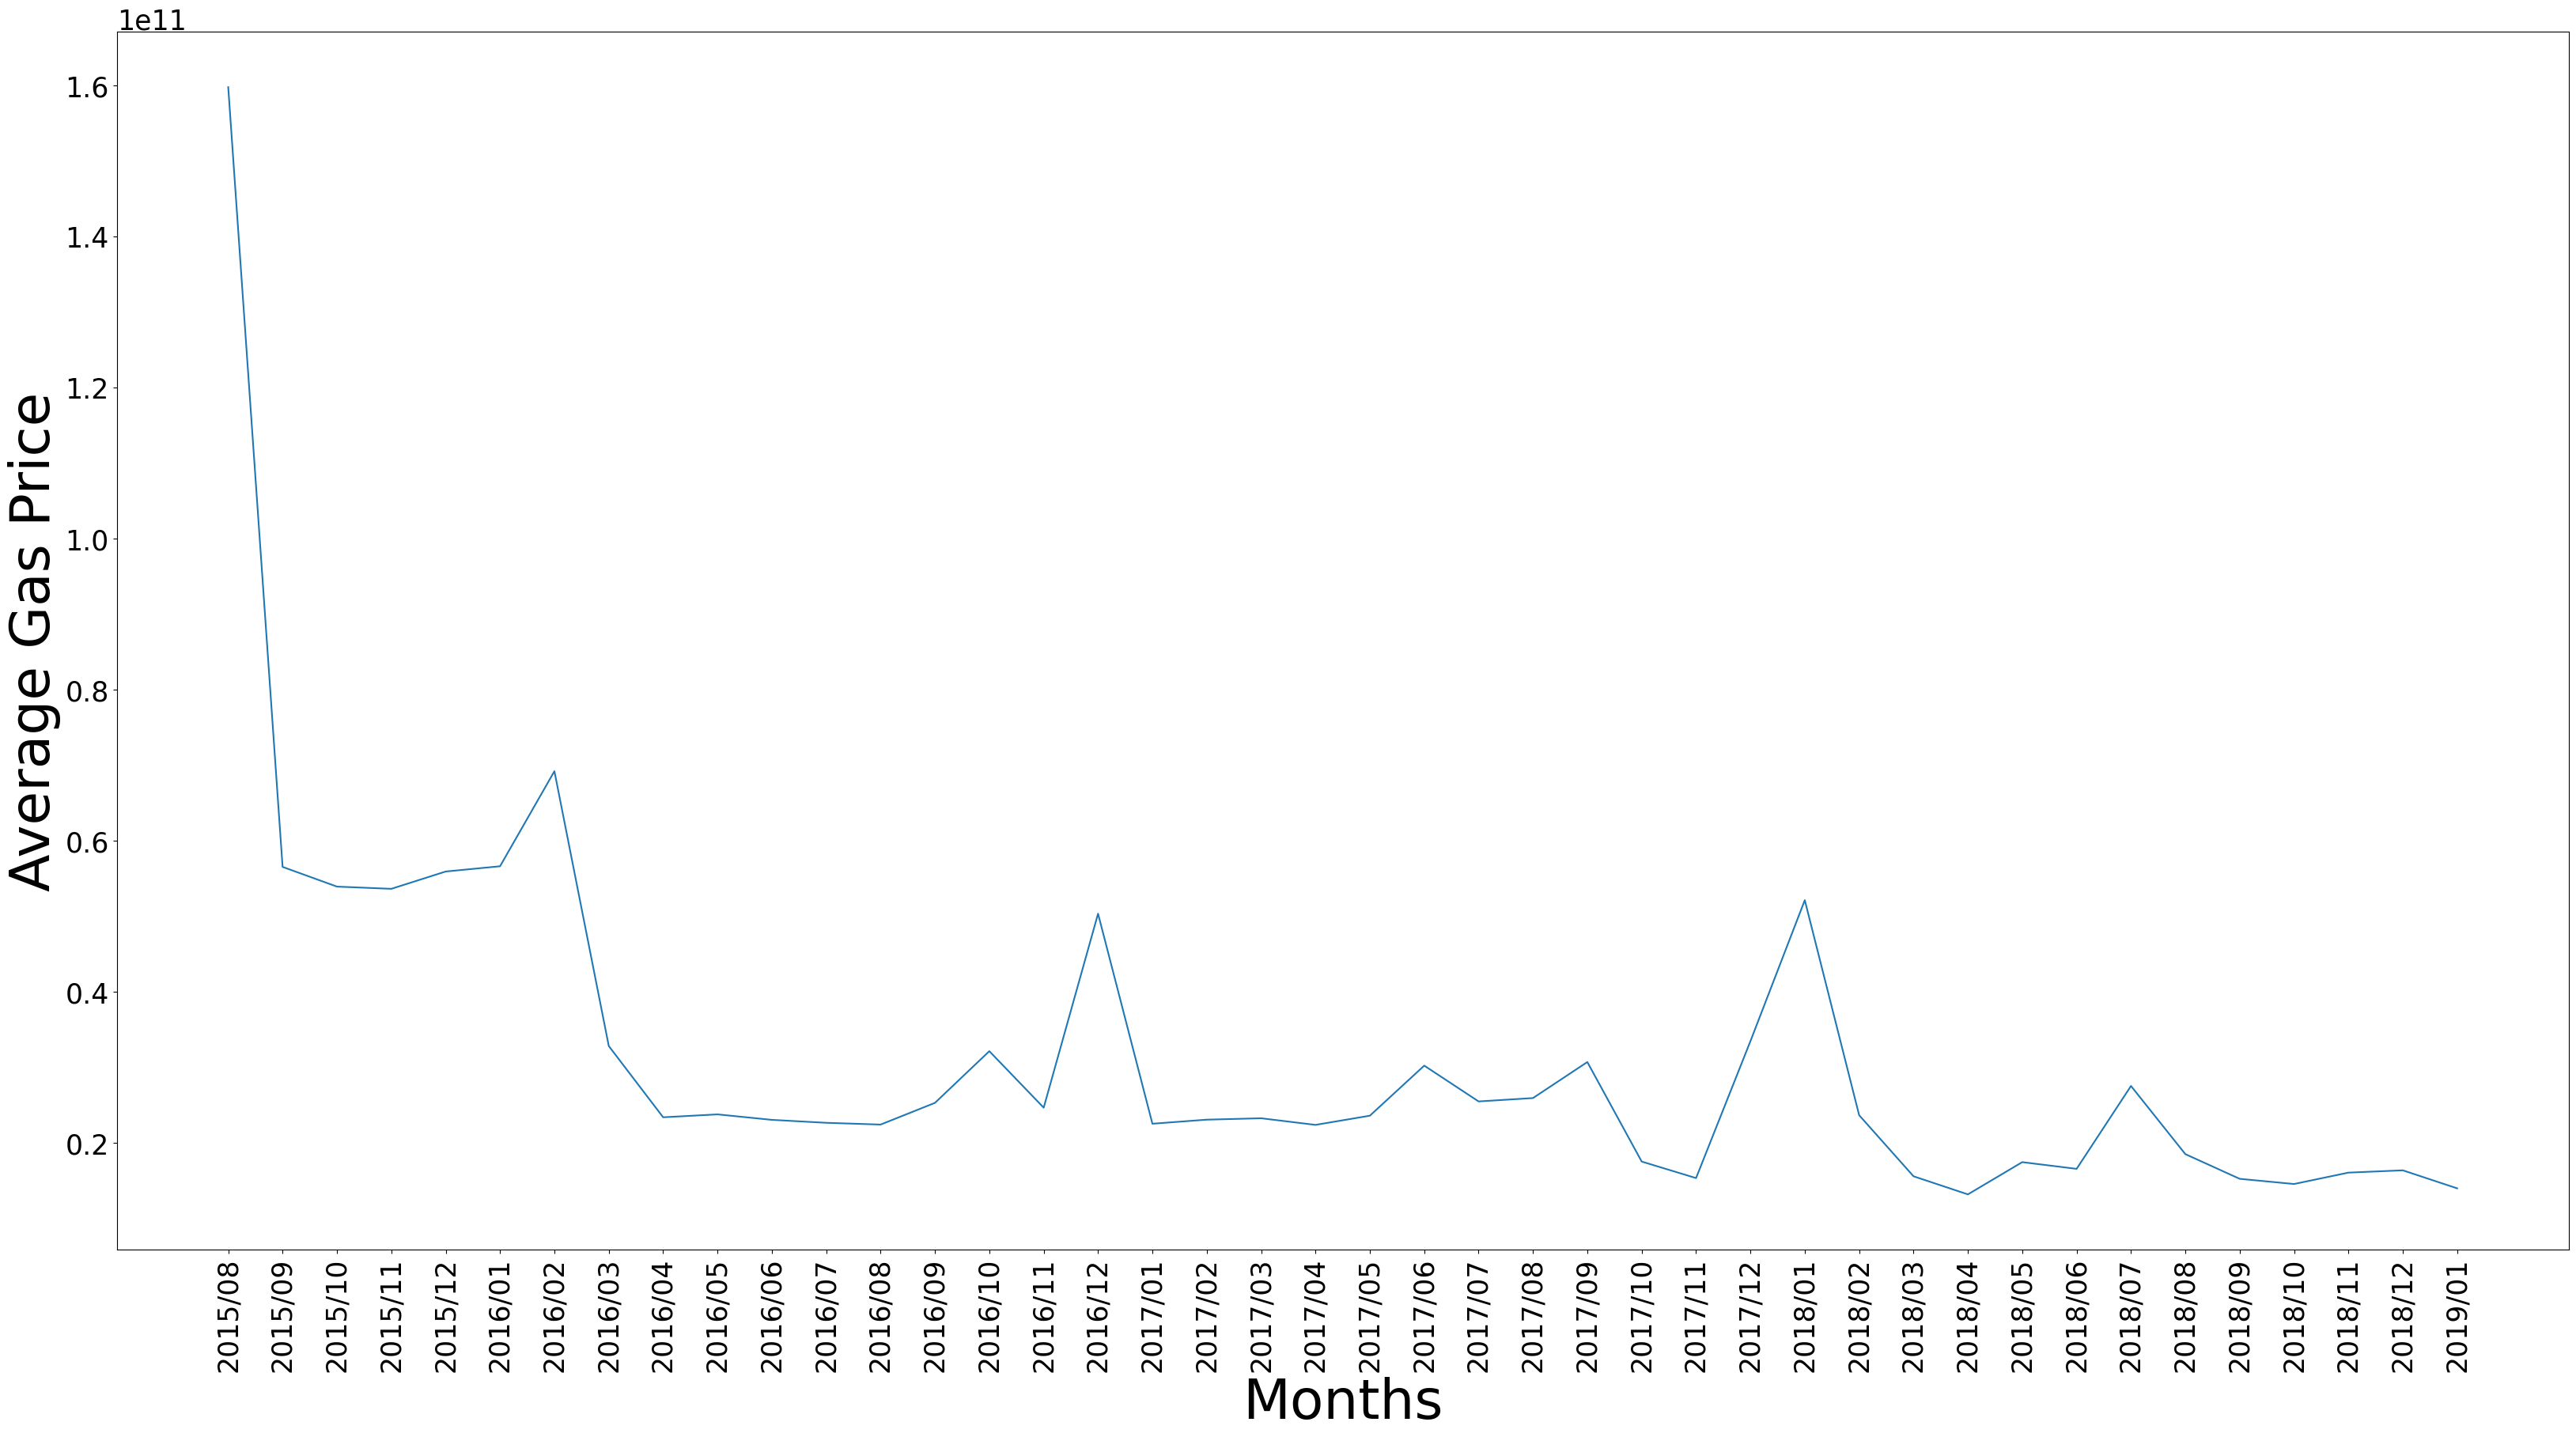

In [10]:
monthly_plots(taskD2_mY_output[:,0], [float(x) for x in taskD2_mY_output[:, 2]], "Average Gas Price")

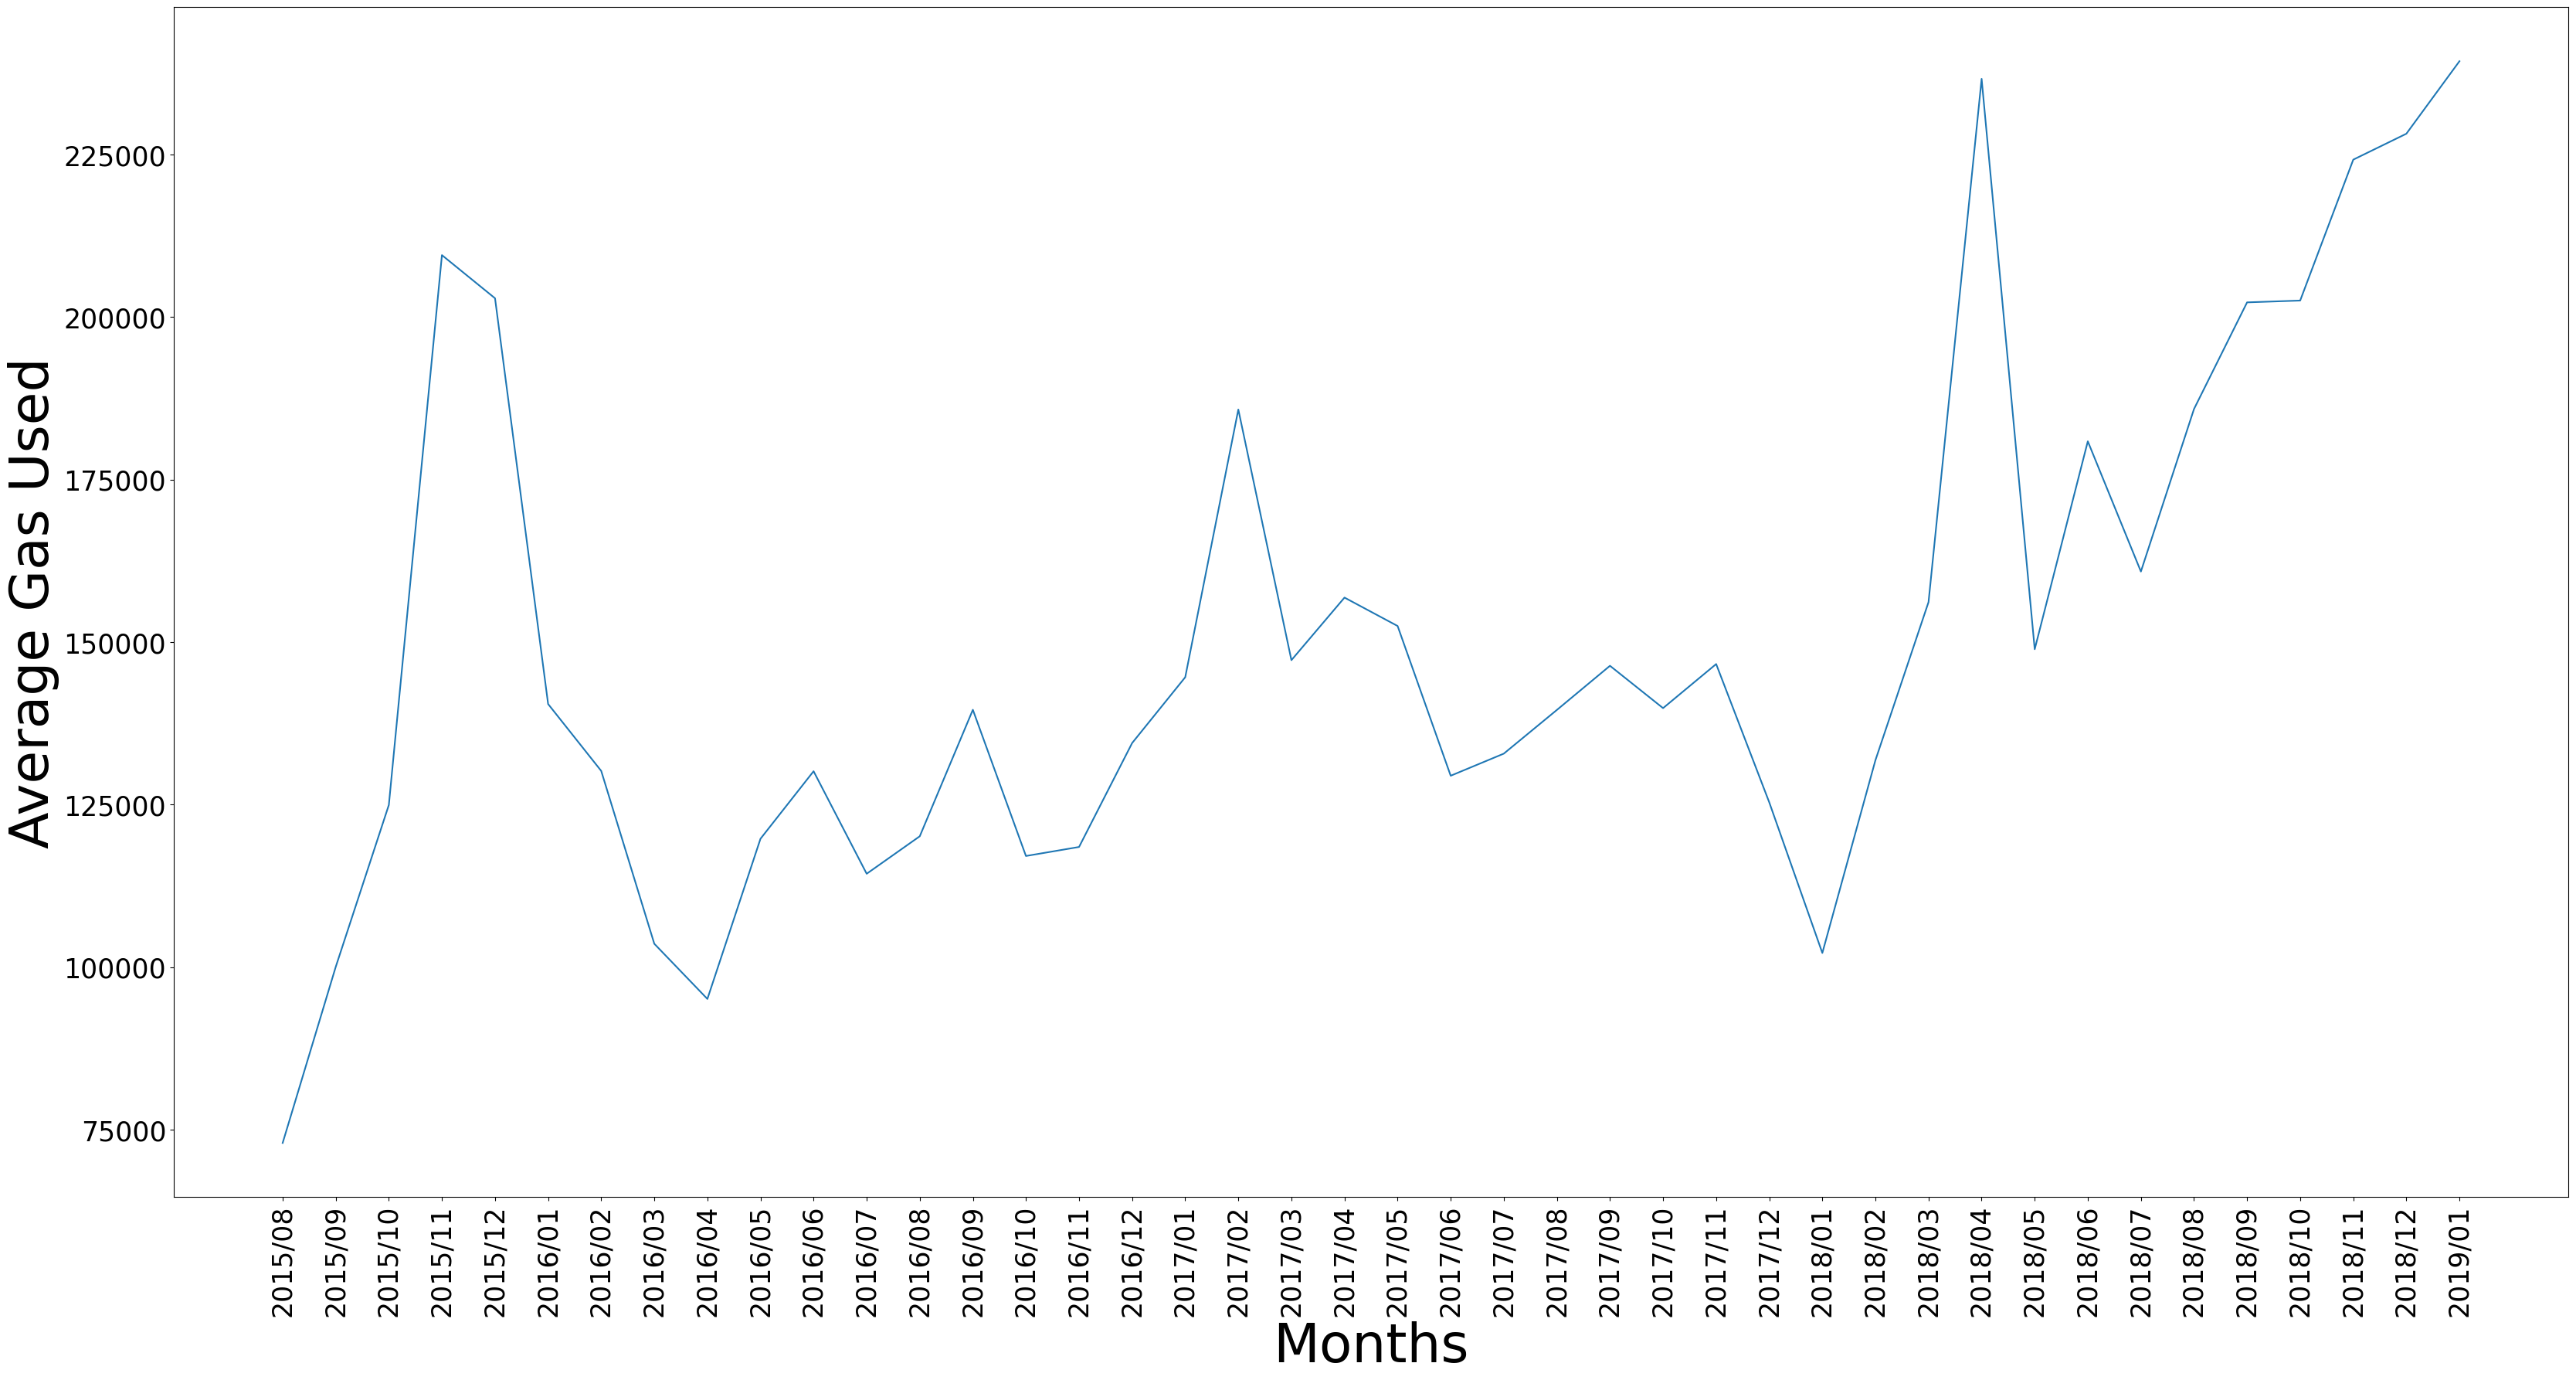

In [11]:
monthly_plots(taskD2_mY_output[:,0], [float(x) for x in taskD2_mY_output[:, 1]], "Average Gas Used")

#### D.2.2: Comparison of average gas used by top services

In [12]:
# Task D.2.2 output: average gas used over the whole dataset of transactions
taskD2_avg_gas_used = 161725.69962368018

# Task D.2.2 output: List of - [address, avg gas used] 
taskD2_top10_avg = [["0x341e790174e3a4d35b65fdc067b6b5634a61caea", 198832.66666666666], 
                    ["0xe28e72fcf78647adce1f1252f240bbfaebd63bcc", 150945.27918781727], 
                    ["0xe94b04a0fed112f3664e45adb2b8915693dd5ff3", 136704.900966096], 
                    ["0xabbb6bebfa05aa13e908eaa492bd7a8343760477", 101932.03479546004], 
                    ["0x7727e5113d1d161373623e5f49fd568b4f543a9e", 89826.72419423984], 
                    ["0xaa1a6e3e6ef20068f7f8d8c835d2d22fd5116444", 83153.10930123563], 
                    ["0x58ae42a38d6b33a1e31492b60465fa80da595755", 50212.80846597866], 
                    ["0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef", 42553.82170235774], 
                    ["0xbfc39b6f805a9e40e77291aff27aee3c96915bdd", 39999.61330880607], 
                    ["0xc7c7f6660102e9a1fee1390df5c76ea5a5572ed3", 33973.648482614575]]
above_avg = []
below_avg = []
for addr, gas_used in taskD2_top10_avg:
    if gas_used >= taskD2_avg_gas_used:
        above_avg.append(addr)
    else:
        below_avg.append(addr)
        
print("Above average gas used:", above_avg)
print("Below average gas used:", below_avg)

Above average gas used: ['0x341e790174e3a4d35b65fdc067b6b5634a61caea']
Below average gas used: ['0xe28e72fcf78647adce1f1252f240bbfaebd63bcc', '0xe94b04a0fed112f3664e45adb2b8915693dd5ff3', '0xabbb6bebfa05aa13e908eaa492bd7a8343760477', '0x7727e5113d1d161373623e5f49fd568b4f543a9e', '0xaa1a6e3e6ef20068f7f8d8c835d2d22fd5116444', '0x58ae42a38d6b33a1e31492b60465fa80da595755', '0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef', '0xbfc39b6f805a9e40e77291aff27aee3c96915bdd', '0xc7c7f6660102e9a1fee1390df5c76ea5a5572ed3']


### D.3: Popular Scams

Utilising the provided scam dataset, what is the most lucrative form of scam? How does this change throughout time, and does this correlate with certain known scams going offline/inactive? To obtain the marks for this catergory you should provide the id of the most lucrative scam and a graph showing how the ether received has changed over time for the dataset.

### Solution

#### D.3.1: Most lucrative scams

In [13]:
taskD3_top_scams = [["5622_Scamming", 16709083588073530571339], ["2135_Phishing", 6583972305381559340034], 
                    ["90_Phishing", 5972589629102419738989], ["2258_Phishing", 3462807524703738820904], 
                    ["2137_Phishing", 3389914242537183980016], ["2132_Scamming", 2428074787748540121002], 
                    ["88_Phishing", 2067750892013526763661], ["2358_Scamming", 1835176671481489993883], 
                    ["2556_Phishing", 1803046574264181953956], ["1200_Phishing", 1630577419133089537315]]

print("The most lucrative scam is", taskD3_top_scams[0][0])

The most lucrative scam is 5622_Scamming


#### D.3.2: Types of scams and their activity over time

In [14]:
taskD3_scamming = [[["2017/05", "Scamming"], 0], [["2017/06", "Scamming"], 9878410120000000000], [["2017/07", "Scamming"], 2452981753628540121002], [["2017/08", "Scamming"], 30164742870000000000], [["2017/09", "Scamming"], 181866732896218700114], [["2017/10", "Scamming"], 1843586508663253070188], [["2017/11", "Scamming"], 3313865781457444576], [["2017/12", "Scamming"], 28672302648918747084], [["2018/01", "Scamming"], 803098320208667479640], [["2018/02", "Scamming"], 548451069988353626717], [["2018/03", "Scamming"], 3306005122269266940795], [["2018/04", "Scamming"], 2591677970317916904218], [["2018/05", "Scamming"], 2072461619819394441399], [["2018/06", "Scamming"], 2744024628105125340064], [["2018/07", "Scamming"], 3392059628091102197748], [["2018/08", "Scamming"], 1190915498037060761765], [["2018/09", "Scamming"], 17950015894588455531420], [["2018/10", "Scamming"], 1759543527902562120422], [["2018/11", "Scamming"], 237846121295971422203], [["2018/12", "Scamming"], 478896099533022268811], [["2019/01", "Scamming"], 1528806348292919943]]
taskD3_scamming_new = np.array([[x[0][0], x[1]] for x in taskD3_scamming])

taskD3_phishing = [[["2017/05", "Phishing"], 90000000000000000], [["2017/06", "Phishing"], 1000000000000000000], [["2017/07", "Phishing"], 10601485555862425267960], [["2017/08", "Phishing"], 14175133698804715716729], [["2017/09", "Phishing"], 3628698627630693984708], [["2017/10", "Phishing"], 2771208122486755788873], [["2017/11", "Phishing"], 3625307740195659707469], [["2017/12", "Phishing"], 2004070215596173477729], [["2018/01", "Phishing"], 2852623201117521082235], [["2018/02", "Phishing"], 556277335842466025552], [["2018/03", "Phishing"], 110503762814457062612], [["2018/04", "Phishing"], 431378955798934750845], [["2018/05", "Phishing"], 981443006835040424695], [["2018/06", "Phishing"], 999943232518418127096], [["2018/07", "Phishing"], 138035036261792915708], [["2018/08", "Phishing"], 48262224842858469476], [["2018/09", "Phishing"], 34137446255500000000], [["2018/10", "Phishing"], 34319384001457592063], [["2018/11", "Phishing"], 75302427910076440209], [["2018/12", "Phishing"], 145216740481604475524], [["2019/01", "Phishing"], 4124732020000000000]]
taskD3_phishing_new = np.array([[x[0][0], x[1]] for x in taskD3_phishing])

taskD3_fakeico = [[["2017/05", "Fake ICO"], 0], [["2017/06", "Fake ICO"], 182674023323763268000], [["2017/07", "Fake ICO"], 16242199484949186112], [["2017/08", "Fake ICO"], 181164662377136166221], [["2017/09", "Fake ICO"], 975138363413781359345], [["2018/06", "Fake ICO"], 1238318290000000000]]
taskD3_fakeico_new = np.array([[x[0][0], x[1]] for x in taskD3_fakeico])

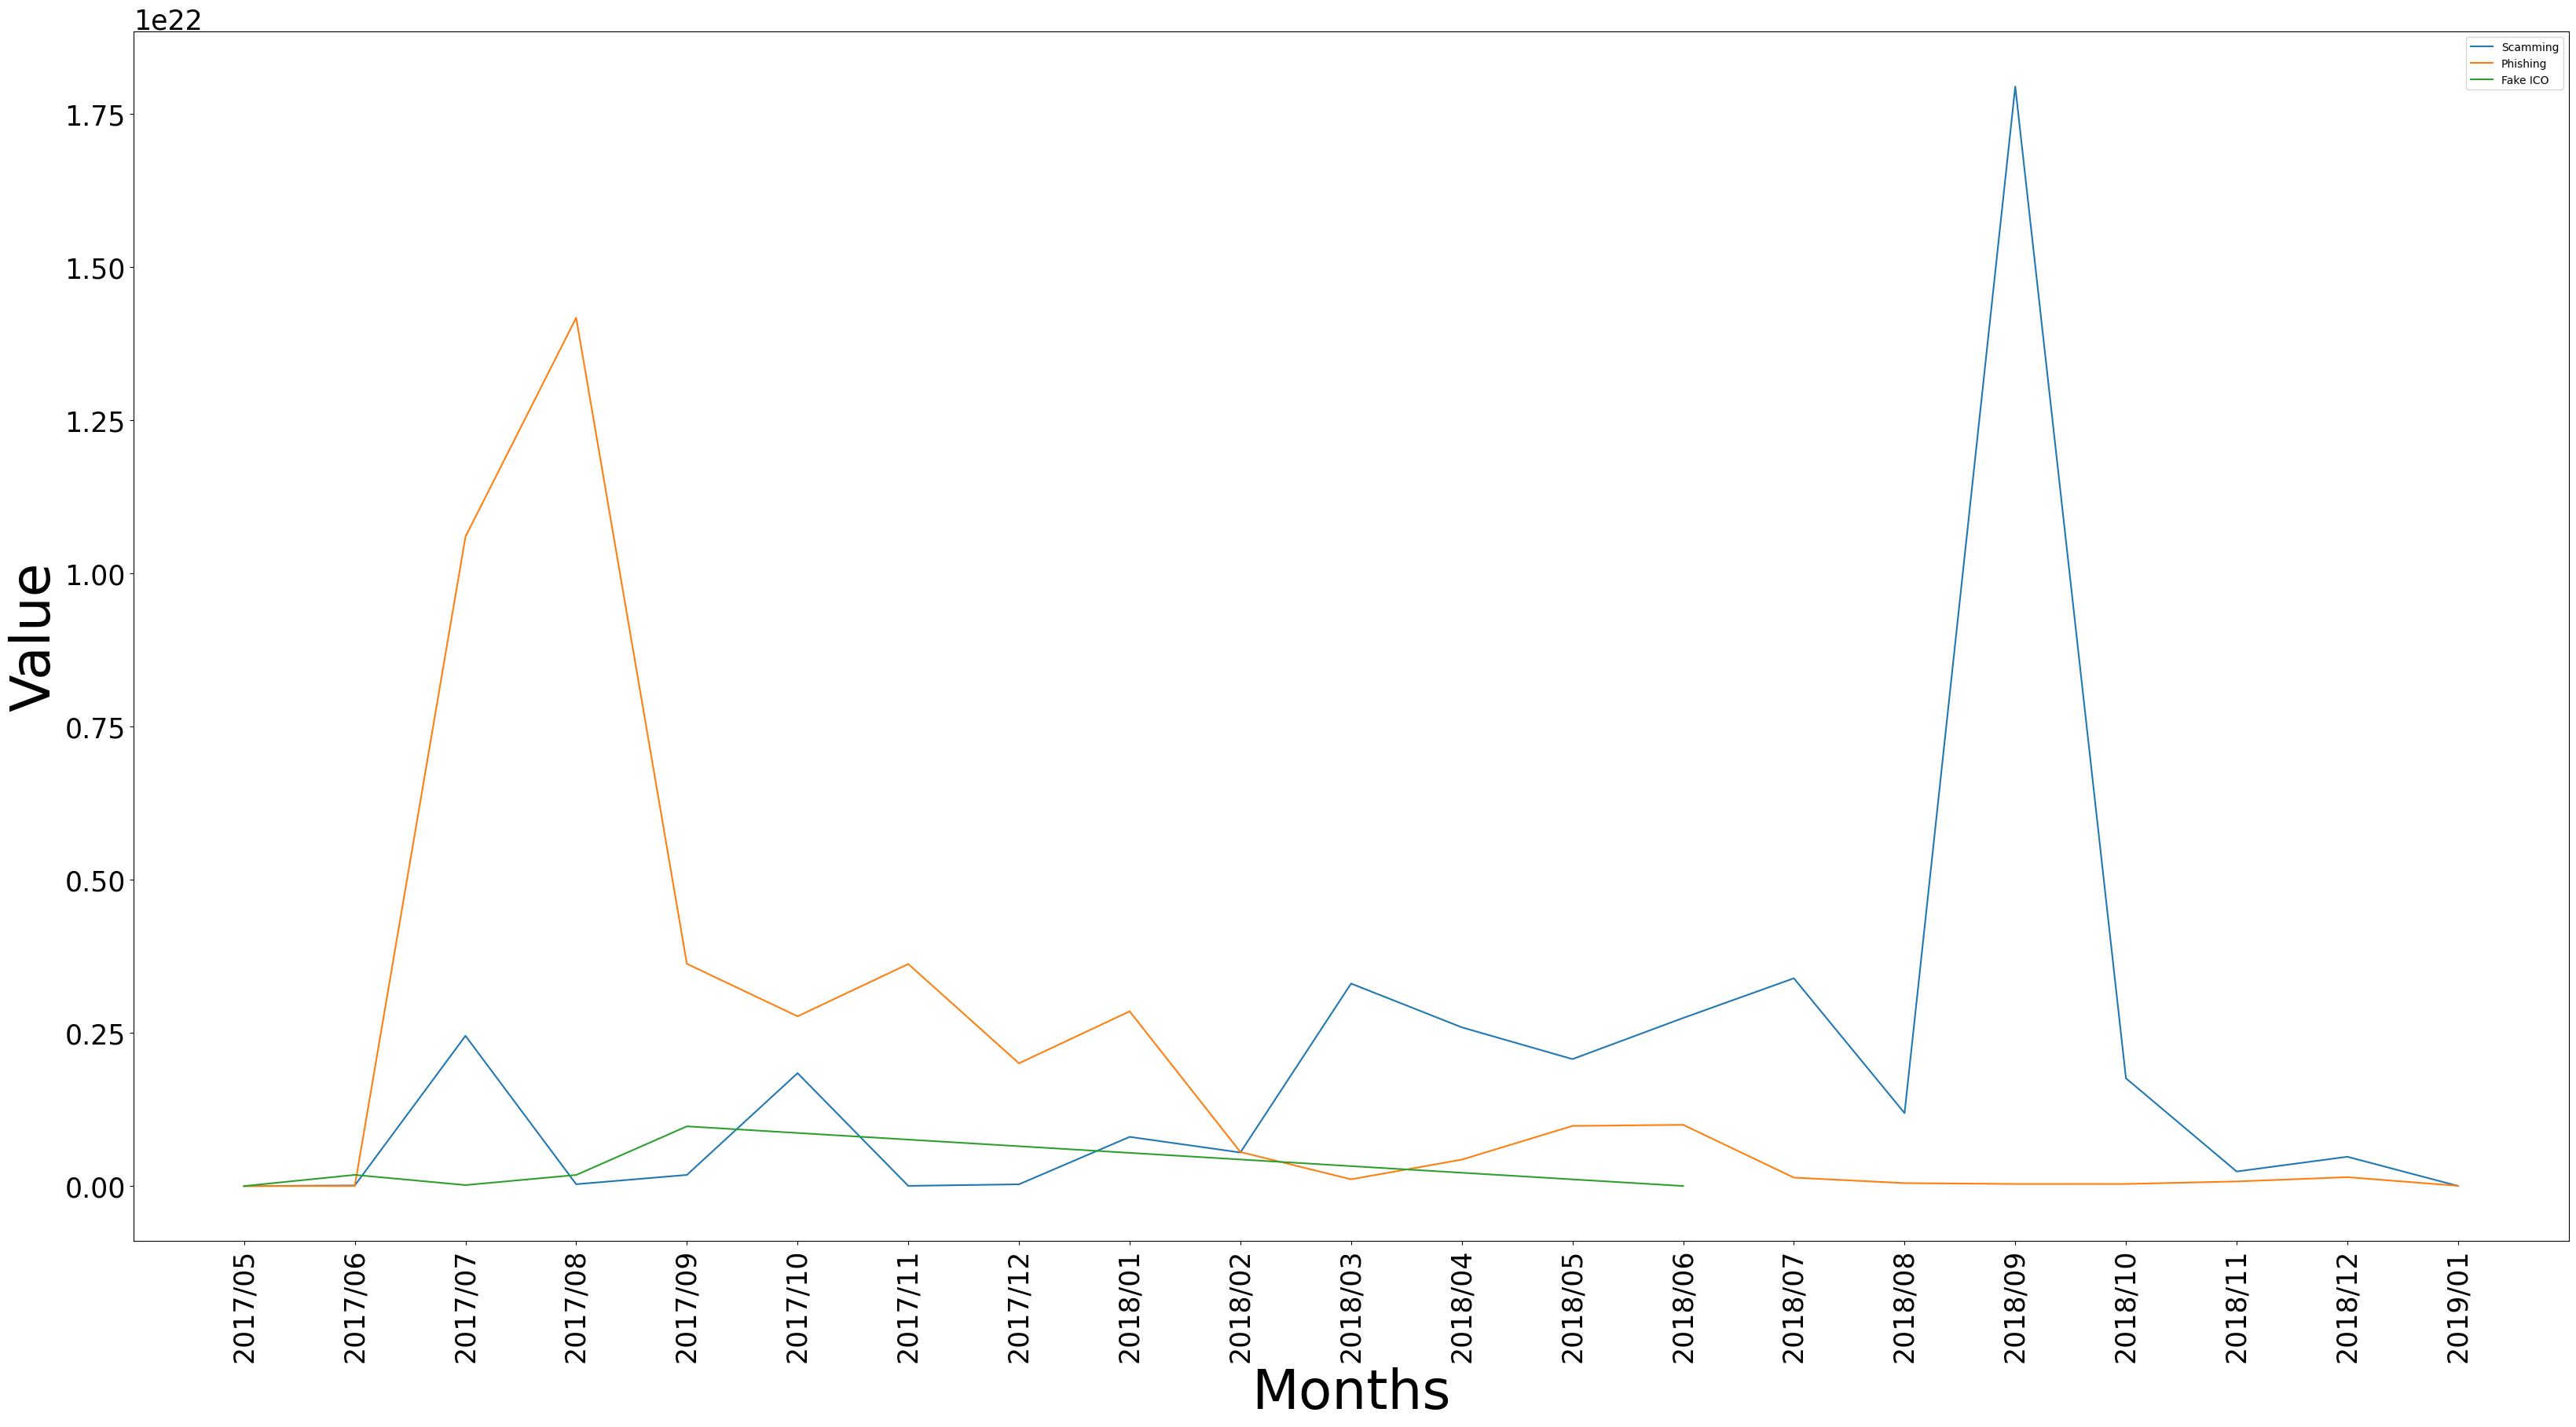

In [15]:
plt.figure(figsize=(40,20))
plt.plot(taskD3_scamming_new[:,0], [float(x) for x in taskD3_scamming_new[:, 1]], label="Scamming")
plt.plot(taskD3_phishing_new[:,0], [float(x) for x in taskD3_phishing_new[:, 1]], label="Phishing")
plt.plot(taskD3_fakeico_new[:,0], [float(x) for x in taskD3_fakeico_new[:, 1]], label="Fake ICO")
plt.xticks(rotation=90)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.xlabel("Months", fontsize=50)
plt.ylabel("Value", fontsize=50)
plt.legend()
plt.show()

In [16]:
print("Total Scamming", np.sum([float(x) for x in taskD3_scamming_new[:, 1]]))
print("Total Phishing", np.sum([float(x) for x in taskD3_phishing_new[:, 1]]))
print("Total Fake ICO", np.sum([float(x) for x in taskD3_fakeico_new[:, 1]]))

Total Scamming 4.162698862311359e+22
Total Phishing 4.321856144727655e+22
Total Fake ICO 1.35645756688963e+21


### END